In [1]:
import csv
import cv2
import numpy as np

def read_csv(root_path):
    with open(root_path + 'driving_log.csv', 'r') as f:
        reader = csv.reader(f)
        for line in reader:
            yield line

def make_local_path(path, local_root):
    basename = path.split('/')[-1]
    return local_root + 'IMG/' + basename

def load_image(local_path):
    return cv2.imread(local_path)

def extract_images(csv_line, local_root):
    paths = csv_line[0:3]
    return [load_image(make_local_path(p, local_root)) for p in paths]

def extract_measurements(csv_line):
    return float(csv_line[3])

In [2]:
images = []
measurements = []

forward_img = './data/forward/'
reverse_img = './data/reverse/'

print("Reading forward images...\n")
for line in read_csv(forward_img):
    images.append(extract_images(line, forward_img)[0])
    measurements.append(extract_measurements(line))

print("Reading reverse images...\n")
for line in read_csv(reverse_img):
    images.append(extract_images(line, reverse_img)[0])
    measurements.append(extract_measurements(line))

X_train = np.array(images)
y_train = np.array(measurements)

print("Training set shape: ", X_train.shape)
print("Labels shape: ", y_train.shape)


Reading forward images...

Reading reverse images...

Training set shape:  (15911, 160, 320, 3)
Labels shape:  (15911,)


In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Convolution2D, MaxPooling2D

image_shape = X_train.shape[1:]

model = Sequential()
model.add(Convolution2D(6, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=2, padding='valid'))
model.add(Convolution2D(16, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(1))

Using TensorFlow backend.


In [4]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, verbose=2)

model.save('model.h5')

Train on 12728 samples, validate on 3183 samples
Epoch 1/10
39s - loss: 45538.8306 - val_loss: 5.3354
Epoch 2/10
35s - loss: 4.0569 - val_loss: 5.4329
Epoch 3/10
35s - loss: 3.1224 - val_loss: 3.7370
Epoch 4/10
35s - loss: 5.0169 - val_loss: 6.3192
Epoch 5/10
35s - loss: 6.4902 - val_loss: 4.6508
Epoch 6/10
35s - loss: 7.5446 - val_loss: 7.0476
Epoch 7/10
35s - loss: 5.7946 - val_loss: 8.8503
Epoch 8/10
35s - loss: 5.2462 - val_loss: 13.6540
Epoch 9/10
35s - loss: 4.7409 - val_loss: 3.7449
Epoch 10/10
35s - loss: 3.8016 - val_loss: 2.4895


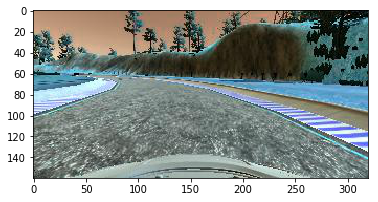

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(images[0])

In [13]:
MaxPooling2D?